# MC886 Assigment 1

## Objective:
Use linear regression model to predict the prices of diamonds given their atributes. The data set might be found on:
https://www.kaggle.com/shivam2503/diamonds.


In [1]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from utils import *

In [2]:
data_dir = '../data/diamonds.csv'

In [3]:
with open(data_dir, 'rb') as csvfile:
    dataset = pd.read_csv(data_dir)
    
print(type(dataset))

<class 'pandas.core.frame.DataFrame'>


In [4]:
#carat	cut	color	clarity	depth	table	price	x	y	z
# print(dataset['cut'])

## Preprocessing the data

### 1. Split data in training, validation and test
A wise person said: "friends don’t let friends use testing data for training". t.

**Note:**
* **sklearn.model_selection.train_test_split(*arrays, **options)**  
    Split arrays or matrices into random train and test subsets.  
    See documentation:http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

### 2. Put the dataset into Numpy volume
Categorical atributes are changed to integers.  
The cell bellow runs a code to shuffle and split the dataset into 3 sets, training, validation and test.

### 3. Transform categorical data into numbers
Used fit_transform function.
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  
http://pbpython.com/categorical-encoding.html

In [4]:
#RUN THIS ONLY ONCE!
# this code saves the numpy vectors to files
# split_data(dataset)

In [5]:
# lb_make = LabelEncoder()
# print(dataset.shape)
# column = np.empty((dataset.shape[0],1))
# column= lb_make.fit_transform(dataset['cut'])
# # print(dataset['cut'])
# print(dataset['carat'])

In [4]:
#load the numpy files (training set, validation set, test set)
x_train, y_train, x_validation, y_validation, x_test, y_test = load_vectors()
y_train = y_train.reshape((1,y_train.shape[0]))
y_validation = y_validation.reshape((1,y_validation.shape[0]))
y_test = y_test.reshape((1,y_test.shape[0]))
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)
print(x_test.shape)
print(y_test.shape)

(9, 30000)
(1, 30000)
(9, 10000)
(1, 10000)
(9, 13940)
(1, 13940)


In [5]:
def init_parameters(X):
    """
    Receives: the input vector shape (nx, m), where nx is the number of features and
    m the number of examples.
    Returns:
    W: the weight array shape ( 1, nx)
    dW: the derivative array shape ( 1, nx)
    b: a real number (bias)
    db: the derivative of the bias.
    """
    nx = X.shape[0]
    W = np.random.randn(nx,1)*0.01
    dw = np.random.randn(nx,1)*0.01
    b = 0.
    db = 0.
    return W,b, dw, db

In [74]:
def l2_cost(X, Y, Y_hat, m):
    """
    Cost function defined by a variation of the l2 norm function.
    The '2' in the denominator makes its deriative easier
    """
    cost = (1.0/(2*m))*np.sum((Y-Y_hat)**2)
    return cost

In [7]:
#FORWARD PROPAGATION (WELL THIS IS NOT A NN, BUT ...)
def forward_prop(X, w, b):
    """
    X is the input vector with m training examples, shape (1,m)
    w: is the angular coefficient shape (9,1)
    b: is the linear coefficient  shape (9,1)
    """
    Y_hat = np.dot(w.T, X) + b
    return Y_hat

In [8]:
def backward_propagation(X,Y, Y_hat, m):
    """
    Calculates the derivatives of the parameters
    returns:
    dw
    db
    """
    nx = X.shape[0]
    ny = Y.shape[0]
    dw = (-1./m)*np.dot(X,(Y -Y_hat).T)
    db = (-1./m)*np.sum((Y -Y_hat))
    assert(dw.shape == (nx, ny))
    return dw, db

In [9]:
def GD_model(X,Y, num_iterations = 100, learning_rate = 0.000000001):
    """
    Arguments:
    X: input array shape (nx, m), nx is the number of input features and m the number of
    training examples.
    Y: label array shape (ny, m) where ny is the number of the output feature.
    Given X and Y estimates the best linear function to fit the data
    """
    m = X.shape[1]
    print('m = ', m) 
    
    w,b,dw,db = init_parameters(x_train)
    for iteration in range(num_iterations):
        
        #forward propagation (we can think the activation function as linear)
        Y_hat = forward_prop(X,w,b)
        
        #plot the cost function
        cost = l2_cost(X,Y, Y_hat,m)
        plt.plot(iteration,cost,'ro')
    
        #Backward propagation calculate the derivatives 
        dw, db = backward_propagation(X,Y,Y_hat, m)
    
        #Update parameters simultaneusly
        temp_w = w - learning_rate*dw
        temp_b = b - learning_rate*db
        w = temp_w
        b = temp_b
    plt.show()
    print("dw.shape = ", dw.shape)
    print("db.shape = ", db.shape)
    print("w.shape = ", w.shape)
    return w, b, cost

m =  30000


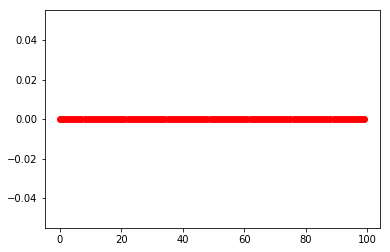

dw.shape =  (9, 1)
db.shape =  ()
w.shape =  (9, 1)
cost in the training set:  0.0
weights:  [[ 3.14708041e-03]
 [ 3.46925434e-03]
 [-1.26379996e-02]
 [-9.02778589e-05]
 [-5.91753586e-03]
 [ 2.08698646e-03]
 [ 2.50749393e-04]
 [ 9.52906039e-03]
 [ 4.83558091e-04]]
bias:  1.0137477215807435e-06


In [10]:
w_gd, b_gd, cost_gd= GD_model(x_train,y_train)
print("cost in the training set: ", cost_gd)
print("weights: ", w_gd)
print("bias: ", b_gd)

In [11]:
def SGD_model(X,Y, num_iterations = 20, learning_rate = 0.00000001):
    """
    X: an input array shape (nx, m), nx is the input feature size and m is the number of training examples
    Given X and Y estimates the best linear function to fit the data
    """
    # initialize parameters
    w,b,dw,db = init_parameters(x_train)
    print("first ", dw)
    m = X.shape[1]    # number of training examples
    nx = X.shape[0]   # number of features in the input
    ny = Y.shape[0]   # number of features in the label
    
    # for each epoch
    for iteration in range(num_iterations):
        print("\riteração: ", iteration +1, end = "")
        #for each element in the example's vector (shape (9,1))
        Y_hat = np.empty((ny, m))
        for i in range(m):
            #extract a columns of the input, remember the ith column has the ith example
            x_i = X[:, i].reshape(nx,1) #reshape to avoid rank 1 array
            y_i = Y[:, i].reshape(ny,1)
#             print("x_i.shape = ", x_i.shape)
#             print("y_i.shape = ", y_i.shape)
#             print("w.shape = ", w.shape)
            
            #calulate the prediction y_hat
            y_hat_i = np.dot(w.T,x_i) + b
            Y_hat[:,i] = y_hat_i
#             print("y_hat_i.shape = ", y_hat_i.shape)
            
#             #calculate the derivatives
#              dw = (-1./m)*np.dot(X,(Y -Y_hat).T)
#     db = (-1./m)*np.sum((Y -Y_hat))
            
#             dw = 
            dw, db = backward_propagation(x_i,y_i,y_hat_i, 1)
#             print("dw.shape = ", dw.shape)
#             print("db.shape = ", db.shape)
            #Update parameters simultaneusly
            temp_w = w - learning_rate*dw
            temp_b = b - learning_rate*db
            w = temp_w
            b = temp_b
            #plot the cost function
#             cost = (1./(2.))*np.sum((label -Y_hat)**2)
        cost = l2_cost(X,Y, Y_hat,m)
        print("cost = ", cost)
        plt.plot(iteration,cost,'ro')
    plt.show()
    return w, b, cost

first  [[-0.00491453]
 [-0.00433729]
 [-0.00418172]
 [-0.00664085]
 [-0.00823004]
 [ 0.01653417]
 [-0.00956564]
 [-0.00626606]
 [ 0.01373241]]
iteração:  1cost =  2.957403211224684
iteração:  2cost =  0.5041860673035897
iteração:  3cost =  0.17965647410051264
iteração:  4cost =  0.12610554119497588
iteração:  5cost =  0.11437204974475083
iteração:  6cost =  0.11109790632890243
iteração:  7cost =  0.11003457649586973
iteração:  8cost =  0.1096439577056849
iteração:  9cost =  0.1094720211898607
iteração:  10cost =  0.10937297003510309
iteração:  11cost =  0.10929845356512949
iteração:  12cost =  0.10923225378120544
iteração:  13cost =  0.10916890946468928
iteração:  14cost =  0.10910657912531388
iteração:  15cost =  0.10904464149064777
iteração:  16cost =  0.1089828868723883
iteração:  17cost =  0.10892124443928458
iteração:  18cost =  0.10885969020989274
iteração:  19cost =  0.10879821601015542
iteração:  20cost =  0.10873681899966703


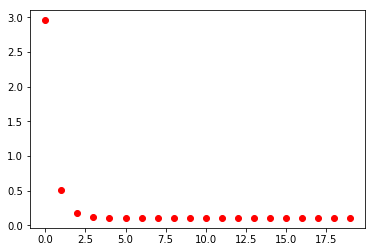

cost in the training set:  0.10873681899966703
weights:  [[-0.00529717]
 [ 0.00393087]
 [ 0.00174037]
 [-0.00606301]
 [ 0.03364709]
 [ 0.01454324]
 [ 0.00014332]
 [ 0.01526783]
 [-0.00696553]]
bias:  0.0005389781112871184


In [75]:
w_sgd, b_sgd, cost_sgd = SGD_model(x_train,y_train)
print("cost in the training set: ", cost_sgd)
print("weights: ", w_sgd)
print("bias: ", b_sgd)

In [13]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
clf = linear_model.SGDRegressor(loss='squared_loss', penalty='l2', learning_rate = 'constant', eta0 = 0.00000001)
clf.fit(x_train.T, y_train.T)
# Make predictions using the testing set
y_hat = clf.predict(x_train.T)
# The coefficients
print('Coefficients: \n', clf.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_train.T, y_hat.T))
train_size = 30000
print("Error: %.2f"
      % l2_cost(x_train, y_train, y_hat, train_size))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_train.T, y_hat.T))

# cost [element] = l2_cost(x_train, y_train, y_)
# plt.show()
# print(cost)

/home/pcmasterrace/miniconda2/envs/gpu/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/home/pcmasterrace/miniconda2/envs/gpu/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients: 
 [2.27264469e-04 9.83724712e-04 1.15599360e-03 1.32203403e-03
 2.53107579e-02 2.32938023e-02 9.82877455e-05 2.17580720e-03
 2.18375724e-03]
Mean squared error: 0.19
Error: 0.00
Variance score: 0.60


## Normal equation

In [33]:
x0_norm = np.ones((train_size, 1))
X_norm = np.concatenate((x0_norm, x_train.T), axis=1)
# # compute Normal Eq.
XTX_inv = np.linalg.inv(np.matmul(X_norm.T, X_norm))
theta_norm = np.matmul(np.matmul(XTX_inv, X_norm.T), y_train.T)
print('Normal equation compute successfully =D') # check if the system has hanged

Normal equation compute successfully =D


In [39]:
# Test
X_validation_norm = np.concatenate((np.ones((x_validation.shape[1], 1)), x_validation.T), axis=1)
y_validation_norm = y_validation

for i in range(X_validation_norm.shape[0]):
    estimate = np.matmul(theta_norm.T, np.reshape(X_validation_norm[i], (X_norm.shape[1], 1)))
    print('i: %d; estimado: %.3lf; real: %.3lf; diferenca: %.3lf' 
          %(i, estimate, y_validation_norm[:,i], estimate-y_test_norm[:,i]))

i: 0; estimado: 5.221; real: 5.230; diferenca: 1.501
i: 1; estimado: 4.282; real: 4.300; diferenca: 1.692
i: 2; estimado: 3.694; real: 3.710; diferenca: -0.476
i: 3; estimado: 4.335; real: 4.340; diferenca: 0.815
i: 4; estimado: 2.872; real: 2.880; diferenca: -0.078
i: 5; estimado: 3.516; real: 3.530; diferenca: -0.824
i: 6; estimado: 4.641; real: 4.670; diferenca: 0.811
i: 7; estimado: 3.522; real: 3.530; diferenca: -0.938
i: 8; estimado: 2.702; real: 2.690; diferenca: 0.032
i: 9; estimado: 3.238; real: 3.250; diferenca: -1.422
i: 10; estimado: 4.794; real: 4.800; diferenca: 2.134
i: 11; estimado: 4.052; real: 4.070; diferenca: 1.252
i: 12; estimado: 3.258; real: 3.240; diferenca: -0.852
i: 13; estimado: 2.900; real: 2.910; diferenca: -0.120
i: 14; estimado: 2.877; real: 2.870; diferenca: 0.187
i: 15; estimado: 2.587; real: 2.580; diferenca: -1.473
i: 16; estimado: 2.936; real: 2.940; diferenca: 0.196
i: 17; estimado: 4.347; real: 4.370; diferenca: 0.397
i: 18; estimado: 3.932; real: 

i: 2111; estimado: 2.997; real: 2.980; diferenca: -0.533
i: 2112; estimado: 3.597; real: 3.590; diferenca: 0.897
i: 2113; estimado: 2.980; real: 2.990; diferenca: -0.010
i: 2114; estimado: 3.904; real: 3.890; diferenca: 0.514
i: 2115; estimado: 3.900; real: 3.910; diferenca: 0.180
i: 2116; estimado: 3.381; real: 3.390; diferenca: 0.121
i: 2117; estimado: 2.766; real: 2.740; diferenca: -1.674
i: 2118; estimado: 3.993; real: 4.000; diferenca: 0.343
i: 2119; estimado: 2.664; real: 2.660; diferenca: -0.886
i: 2120; estimado: 3.776; real: 3.770; diferenca: 0.616
i: 2121; estimado: 4.093; real: 4.100; diferenca: 0.603
i: 2122; estimado: 2.891; real: 2.880; diferenca: -0.979
i: 2123; estimado: 2.966; real: 2.950; diferenca: -0.844
i: 2124; estimado: 3.191; real: 3.190; diferenca: -0.519
i: 2125; estimado: 3.158; real: 3.170; diferenca: -0.622
i: 2126; estimado: 4.183; real: 4.180; diferenca: 0.923
i: 2127; estimado: 2.986; real: 3.000; diferenca: -1.424
i: 2128; estimado: 3.631; real: 3.640; 

i: 3983; estimado: 4.323; real: 4.320; diferenca: 0.303
i: 3984; estimado: 3.921; real: 3.920; diferenca: 0.151
i: 3985; estimado: 4.218; real: 4.250; diferenca: 1.218
i: 3986; estimado: 2.963; real: 2.950; diferenca: -1.897
i: 3987; estimado: 3.292; real: 3.290; diferenca: 0.032
i: 3988; estimado: 4.058; real: 4.070; diferenca: 0.828
i: 3989; estimado: 3.579; real: 3.560; diferenca: 0.359
i: 3990; estimado: 2.779; real: 2.790; diferenca: -1.421
i: 3991; estimado: 2.807; real: 2.770; diferenca: 0.027
i: 3992; estimado: 2.848; real: 2.880; diferenca: -1.052
i: 3993; estimado: 2.778; real: 2.770; diferenca: 0.098
i: 3994; estimado: 4.037; real: 4.050; diferenca: 0.817
i: 3995; estimado: 2.605; real: 2.620; diferenca: -1.625
i: 3996; estimado: 3.589; real: 3.590; diferenca: -0.671
i: 3997; estimado: 3.041; real: 3.010; diferenca: -0.909
i: 3998; estimado: 4.027; real: 4.020; diferenca: -0.033
i: 3999; estimado: 4.070; real: 4.070; diferenca: 0.550
i: 4000; estimado: 3.001; real: 2.980; di

i: 5965; estimado: 3.165; real: 3.150; diferenca: -1.095
i: 5966; estimado: 3.152; real: 3.140; diferenca: 0.382
i: 5967; estimado: 3.785; real: 3.800; diferenca: -0.815
i: 5968; estimado: 4.123; real: 4.130; diferenca: 0.713
i: 5969; estimado: 3.084; real: 3.120; diferenca: -1.876
i: 5970; estimado: 4.027; real: 4.010; diferenca: 1.307
i: 5971; estimado: 2.698; real: 2.690; diferenca: -0.562
i: 5972; estimado: 4.875; real: 4.760; diferenca: 0.965
i: 5973; estimado: 4.275; real: 4.250; diferenca: 1.525
i: 5974; estimado: 4.219; real: 4.230; diferenca: -1.051
i: 5975; estimado: 3.201; real: 3.180; diferenca: -0.229
i: 5976; estimado: 2.865; real: 2.880; diferenca: -0.845
i: 5977; estimado: 3.480; real: 3.490; diferenca: -0.370
i: 5978; estimado: 4.278; real: 4.270; diferenca: 1.558
i: 5979; estimado: 4.095; real: 4.110; diferenca: 0.105
i: 5980; estimado: 2.674; real: 2.670; diferenca: -1.886
i: 5981; estimado: 3.104; real: 3.130; diferenca: -0.436
i: 5982; estimado: 3.135; real: 3.150;

i: 7881; estimado: 4.286; real: 4.290; diferenca: -0.114
i: 7882; estimado: 2.909; real: 2.920; diferenca: -1.571
i: 7883; estimado: 2.523; real: 2.520; diferenca: -2.507
i: 7884; estimado: 4.524; real: 4.560; diferenca: 0.594
i: 7885; estimado: 3.199; real: 3.200; diferenca: 0.229
i: 7886; estimado: 2.722; real: 2.700; diferenca: -1.298
i: 7887; estimado: 4.434; real: 4.370; diferenca: 0.774
i: 7888; estimado: 2.914; real: 2.910; diferenca: -1.276
i: 7889; estimado: 2.464; real: 2.480; diferenca: -1.356
i: 7890; estimado: 3.978; real: 3.990; diferenca: -0.192
i: 7891; estimado: 4.487; real: 4.470; diferenca: 1.807
i: 7892; estimado: 3.813; real: 3.600; diferenca: 0.643
i: 7893; estimado: 2.978; real: 2.980; diferenca: -1.202
i: 7894; estimado: 3.553; real: 3.560; diferenca: -0.967
i: 7895; estimado: 2.989; real: 2.980; diferenca: -0.031
i: 7896; estimado: 3.568; real: 3.560; diferenca: -0.692
i: 7897; estimado: 3.577; real: 3.570; diferenca: -0.413
i: 7898; estimado: 3.093; real: 3.11

MINIBATCH
---

In [21]:
def hypotesis(theta, X):
    return np.matmul(theta.T, X)

In [97]:
batch_size = 64
n_epoch = 100
batches_per_epoch = int(np.ceil(train_size / float(batch_size)))
# n_steps = int(round(batches_per_epoch * n_epoch))
n_steps = 1000
learning_rate = 0.00000001
cost_mbgd = np.zeros((n_steps))

print('training size: ', train_size)
print('number of epoch: ', n_epoch)
print('batches per epoch: ', batches_per_epoch)
print('number of steps: ', n_steps)

training size:  30000
number of epoch:  100
batches per epoch:  469
number of steps:  1000


In [98]:
from sklearn.utils import shuffle

theta_mbgd = np.random.rand(x_train.shape[0] + 1, 1)
x0_mbgd = np.ones((train_size, 1))
X_mbgd = np.concatenate((x0_mbgd, x_train.T), axis=1)
y_train_mbgd = np.copy(y_train)
print('theta shape', theta_mbgd.shape)
print('x shape', X_mbgd.shape, y_train_mbgd.shape)

for j in range(n_steps):
    X_mbgd, tmp = shuffle(X_mbgd, y_train_mbgd.T, random_state=0) #TODO
    y_train_mbgd = tmp.T
    for i in range(n_epoch):
        h = hypotesis(theta_mbgd, X_mbgd[i:i+batch_size, :].T)
        cost_mbgd[j] = l2_cost(theta_mbgd, h, y_train_mbgd[:, i:i+batch_size], batch_size)
        theta_mbgd = theta_mbgd - (learning_rate  * np.sum((h - np.sum(y_train_mbgd[:, i:i+batch_size]))) / batch_size)
    print('j: %d;\tcost: %.3lf' %(j, cost_mbgd[j]))

theta shape (10, 1)
x shape (30000, 10) (1, 30000)
j: 0;	cost: 13981081.656
j: 1;	cost: 10953299.940
j: 2;	cost: 11328984.798
j: 3;	cost: 13222905.629
j: 4;	cost: 13786853.532
j: 5;	cost: 15731958.678
j: 6;	cost: 9268491.432
j: 7;	cost: 11885977.540
j: 8;	cost: 18200545.170
j: 9;	cost: 13390566.730
j: 10;	cost: 16548175.618
j: 11;	cost: 12184313.875
j: 12;	cost: 14110398.080
j: 13;	cost: 9667420.740
j: 14;	cost: 8233383.539
j: 15;	cost: 13142446.602
j: 16;	cost: 12153165.222
j: 17;	cost: 13331502.322
j: 18;	cost: 15192603.969
j: 19;	cost: 11820812.429
j: 20;	cost: 10175584.446
j: 21;	cost: 8487490.689
j: 22;	cost: 7715274.553
j: 23;	cost: 11206972.244
j: 24;	cost: 13107233.891
j: 25;	cost: 9243280.745
j: 26;	cost: 13901142.678
j: 27;	cost: 7478648.746
j: 28;	cost: 9475605.176
j: 29;	cost: 7788292.926
j: 30;	cost: 12198037.210
j: 31;	cost: 15404085.617
j: 32;	cost: 13630015.984
j: 33;	cost: 9078793.164
j: 34;	cost: 10882890.166
j: 35;	cost: 5934336.057
j: 36;	cost: 8870057.379
j: 37;	co

j: 337;	cost: 1154338.370
j: 338;	cost: 1638397.038
j: 339;	cost: 714611.991
j: 340;	cost: 1424966.798
j: 341;	cost: 964254.423
j: 342;	cost: 1123083.179
j: 343;	cost: 999688.323
j: 344;	cost: 1367900.330
j: 345;	cost: 897163.594
j: 346;	cost: 1311065.352
j: 347;	cost: 1203778.743
j: 348;	cost: 1374836.444
j: 349;	cost: 1132948.692
j: 350;	cost: 744034.287
j: 351;	cost: 1478844.560
j: 352;	cost: 1121724.036
j: 353;	cost: 919739.099
j: 354;	cost: 1379051.124
j: 355;	cost: 1483925.867
j: 356;	cost: 1200027.782
j: 357;	cost: 1323543.960
j: 358;	cost: 846127.407
j: 359;	cost: 1478109.271
j: 360;	cost: 1324127.245
j: 361;	cost: 1789434.772
j: 362;	cost: 1234256.890
j: 363;	cost: 1524629.550
j: 364;	cost: 1223006.831
j: 365;	cost: 1032567.840
j: 366;	cost: 1055131.658
j: 367;	cost: 1272357.305
j: 368;	cost: 1238196.188
j: 369;	cost: 893983.086
j: 370;	cost: 1019813.699
j: 371;	cost: 1100564.191
j: 372;	cost: 679963.851
j: 373;	cost: 1242555.996
j: 374;	cost: 994219.320
j: 375;	cost: 1414887.

j: 696;	cost: 181204.309
j: 697;	cost: 223414.122
j: 698;	cost: 178573.273
j: 699;	cost: 208138.832
j: 700;	cost: 332040.974
j: 701;	cost: 210686.931
j: 702;	cost: 217827.786
j: 703;	cost: 134182.675
j: 704;	cost: 170565.623
j: 705;	cost: 98250.266
j: 706;	cost: 127591.146
j: 707;	cost: 223899.828
j: 708;	cost: 197821.133
j: 709;	cost: 182370.192
j: 710;	cost: 212623.319
j: 711;	cost: 189805.912
j: 712;	cost: 184367.396
j: 713;	cost: 165892.928
j: 714;	cost: 117524.605
j: 715;	cost: 189286.812
j: 716;	cost: 208623.012
j: 717;	cost: 180245.406
j: 718;	cost: 233774.212
j: 719;	cost: 156221.453
j: 720;	cost: 352750.507
j: 721;	cost: 210074.115
j: 722;	cost: 296787.293
j: 723;	cost: 215409.572
j: 724;	cost: 230517.342
j: 725;	cost: 208987.673
j: 726;	cost: 174287.790
j: 727;	cost: 211964.719
j: 728;	cost: 194398.956
j: 729;	cost: 136351.375
j: 730;	cost: 193364.968
j: 731;	cost: 157733.889
j: 732;	cost: 155091.557
j: 733;	cost: 158409.792
j: 734;	cost: 208490.434
j: 735;	cost: 101414.721
j

In [99]:
X_validation_mbgd = np.concatenate((np.ones((x_validation.shape[1], 1)), x_validation.T), axis=1)
y_validation_mbgd = y_validation

print('*' * 40)

for i in range(len(X_validation_mbgd)):
    estimate = np.matmul(theta_mbgd.T, np.reshape(X_validation_mbgd[i], (X_mbgd.shape[1], 1)))
    print('i: %d; estimado: %.3lf; real: %.3lf; diferenca: %.3lf' 
          %(i, estimate, y_validation_mbgd[:,i], estimate-y_validation_mbgd[:,i]))

****************************************
i: 0; estimado: 1430.751; real: 5.230; diferenca: 1425.521
i: 1; estimado: 156.442; real: 4.300; diferenca: 152.142
i: 2; estimado: 219.548; real: 3.710; diferenca: 215.838
i: 3; estimado: 405.133; real: 4.340; diferenca: 400.793
i: 4; estimado: 29.326; real: 2.880; diferenca: 26.446
i: 5; estimado: 297.426; real: 3.530; diferenca: 293.896
i: 6; estimado: 486.501; real: 4.670; diferenca: 481.831
i: 7; estimado: 275.058; real: 3.530; diferenca: 271.528
i: 8; estimado: 26.369; real: 2.690; diferenca: 23.679
i: 9; estimado: 120.154; real: 3.250; diferenca: 116.904
i: 10; estimado: 1184.042; real: 4.800; diferenca: 1179.242
i: 11; estimado: 341.278; real: 4.070; diferenca: 337.208
i: 12; estimado: 70.548; real: 3.240; diferenca: 67.308
i: 13; estimado: 36.032; real: 2.910; diferenca: 33.122
i: 14; estimado: 43.633; real: 2.870; diferenca: 40.763
i: 15; estimado: -11.091; real: 2.580; diferenca: -13.671
i: 16; estimado: 38.263; real: 2.940; diferenca

i: 2323; estimado: 159.792; real: 3.570; diferenca: 156.222
i: 2324; estimado: 275.100; real: 3.890; diferenca: 271.210
i: 2325; estimado: 815.474; real: 4.410; diferenca: 811.064
i: 2326; estimado: 24.542; real: 2.680; diferenca: 21.862
i: 2327; estimado: 15.486; real: 2.810; diferenca: 12.676
i: 2328; estimado: 840.681; real: 4.520; diferenca: 836.161
i: 2329; estimado: 339.840; real: 4.040; diferenca: 335.800
i: 2330; estimado: 195.190; real: 3.590; diferenca: 191.600
i: 2331; estimado: 110.922; real: 3.190; diferenca: 107.732
i: 2332; estimado: 1543.105; real: 5.290; diferenca: 1537.815
i: 2333; estimado: 102.560; real: 3.240; diferenca: 99.320
i: 2334; estimado: 894.541; real: 4.510; diferenca: 890.031
i: 2335; estimado: 288.075; real: 4.020; diferenca: 284.055
i: 2336; estimado: 293.569; real: 3.840; diferenca: 289.729
i: 2337; estimado: 285.934; real: 3.830; diferenca: 282.104
i: 2338; estimado: 228.487; real: 3.770; diferenca: 224.717
i: 2339; estimado: 38.351; real: 3.160; dif

i: 4133; estimado: 381.232; real: 4.170; diferenca: 377.062
i: 4134; estimado: 13.760; real: 2.900; diferenca: 10.860
i: 4135; estimado: 622.180; real: 4.640; diferenca: 617.540
i: 4136; estimado: 215.062; real: 3.730; diferenca: 211.332
i: 4137; estimado: 568.264; real: 4.340; diferenca: 563.924
i: 4138; estimado: 111.887; real: 3.070; diferenca: 108.817
i: 4139; estimado: 91.148; real: 3.140; diferenca: 88.008
i: 4140; estimado: 779.589; real: 4.520; diferenca: 775.069
i: 4141; estimado: 86.284; real: 3.190; diferenca: 83.094
i: 4142; estimado: 337.789; real: 4.130; diferenca: 333.659
i: 4143; estimado: 194.145; real: 3.520; diferenca: 190.625
i: 4144; estimado: 250.796; real: 3.520; diferenca: 247.276
i: 4145; estimado: 84.743; real: 3.220; diferenca: 81.523
i: 4146; estimado: 590.153; real: 4.010; diferenca: 586.143
i: 4147; estimado: 27.936; real: 2.880; diferenca: 25.056
i: 4148; estimado: 1037.545; real: 4.370; diferenca: 1033.175
i: 4149; estimado: 53.811; real: 3.190; diferenc

i: 5987; estimado: 410.672; real: 4.230; diferenca: 406.442
i: 5988; estimado: 353.140; real: 4.050; diferenca: 349.090
i: 5989; estimado: 245.129; real: 3.700; diferenca: 241.429
i: 5990; estimado: -16.295; real: 2.480; diferenca: -18.775
i: 5991; estimado: -2.023; real: 2.810; diferenca: -4.833
i: 5992; estimado: 5.798; real: 2.740; diferenca: 3.058
i: 5993; estimado: 311.330; real: 3.870; diferenca: 307.460
i: 5994; estimado: 188.684; real: 3.690; diferenca: 184.994
i: 5995; estimado: 101.126; real: 3.230; diferenca: 97.896
i: 5996; estimado: 17.171; real: 2.780; diferenca: 14.391
i: 5997; estimado: 133.843; real: 3.300; diferenca: 130.543
i: 5998; estimado: 44.916; real: 3.110; diferenca: 41.806
i: 5999; estimado: 10.469; real: 2.740; diferenca: 7.729
i: 6000; estimado: 376.015; real: 4.120; diferenca: 371.895
i: 6001; estimado: 157.397; real: 3.560; diferenca: 153.837
i: 6002; estimado: 189.687; real: 3.590; diferenca: 186.097
i: 6003; estimado: 46.454; real: 2.900; diferenca: 43.

i: 8436; estimado: 46.281; real: 3.270; diferenca: 43.011
i: 8437; estimado: 377.154; real: 4.050; diferenca: 373.104
i: 8438; estimado: 28.552; real: 2.710; diferenca: 25.842
i: 8439; estimado: 9.541; real: 2.890; diferenca: 6.651
i: 8440; estimado: 150.475; real: 3.550; diferenca: 146.925
i: 8441; estimado: 1102.300; real: 4.720; diferenca: 1097.580
i: 8442; estimado: 37.549; real: 2.900; diferenca: 34.649
i: 8443; estimado: 29.878; real: 2.660; diferenca: 27.218
i: 8444; estimado: 749.024; real: 4.710; diferenca: 744.314
i: 8445; estimado: 1185.400; real: 4.790; diferenca: 1180.610
i: 8446; estimado: 23.606; real: 2.790; diferenca: 20.816
i: 8447; estimado: 15.246; real: 2.720; diferenca: 12.526
i: 8448; estimado: 2.675; real: 2.690; diferenca: -0.015
i: 8449; estimado: 227.828; real: 3.550; diferenca: 224.278
i: 8450; estimado: 693.497; real: 4.030; diferenca: 689.467
i: 8451; estimado: 151.758; real: 3.620; diferenca: 148.138
i: 8452; estimado: 343.592; real: 3.900; diferenca: 339

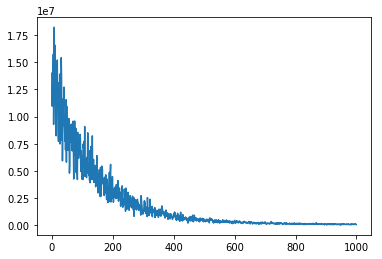

In [104]:
# print(range(cost))
plt.plot(range(cost_mbgd.shape[0]), cost_mbgd)

Rascunho
===

In [51]:
print(theta_mbgd)

[[ 0.53491286]
 [ 0.6379982 ]
 [ 0.37774238]
 [ 0.50539725]
 [ 0.57954612]
 [ 0.76997255]
 [-0.04655329]
 [ 0.86618853]
 [ 0.02731701]
 [ 0.09549509]]


In [57]:
print(cost_mbgd)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [63]:
a = np.array([1,2])
b = np.random.rand((2))
print(l2_cost(np.array([1,2]), a,  b, 2 ))

0.0


In [62]:
np.random.rand((2))

array([0.54282352, 0.37365688])

In [71]:
print(float((1/(2*2)))*np.sum(a-b)**2)

0.0


In [73]:
print((1.0/(2*2)))

0.25
